# Fitting AUSF

The model requires the fitting of pig population dynamics and ASF disease dynamics. We first fit the population to ensure that the population returns to the carrying capacity

### Load Modules

In [1]:
using GpABC, Distances, Distributions, Plots, StatsBase, Printf
using DiffEqCallbacks, DifferentialEquations, LinearAlgebra
using DelimitedFiles, DataFrames, LinearAlgebra, SparseArrays


In [2]:
using QuadGK

In [3]:
using Random

In [4]:
include("/home/callum/ASF/Modules/ASF_input.jl");
include("/home/callum/ASF/Modules/ASF_model.jl");
#include("/home/callum/ASF/Modules/ASF_analysis.jl")

In [5]:
input_path = "/home/callum/ASF/Inputs/"; #path to model data

### Model

In [6]:

input = ASF_Inputs.Model_Data(input_path, true); #loading the model input

┌ Info: Running with seasons
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:54
┌ Info: Watts Strogatz Small Worlds Network
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:60
┌ Info: Rho: 0.15
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:61
┌ Warning: Intra-group transmission of 0.535
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:177
┌ Warning: Inter-group transmission of 0.04
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:181
┌ Warning: Corpse infectivity of 0.85
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:185
┌ Warning: Immunity period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:189
┌ Warning: Deacy period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:193
┌ Info: 1000 Feral Groups
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:374
┌ Info: 0 Farm Populations
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:375


In [7]:
const nt = input.Parameters.Populations.cum_sum[end] #total number of groups and farms
const nc = 5 #number of classes
const eqs = 11 #number of processes

const dc = sparse(zeros(nt*nc,nt*eqs))

#const _dc = zeros(nt*5,nt*10)

dc[0*nc*nt+1:nc*nt*eqs+nc:end] .= 1
dc[1*nc*nt+1:nc*nt*eqs+nc:end] .= -1
dc[2*nc*nt+1:nc*nt*eqs+nc:end] .= -1
dc[10*nc*nt+1:nc*nt*eqs+nc:end] .= 1

dc[2*nc*nt+2:nc*nt*eqs+nc:end] .= 1
dc[3*nc*nt+2:nc*nt*eqs+nc:end] .= -1
dc[4*nc*nt+2:nc*nt*eqs+nc:end] .= -1

dc[4*nc*nt+3:nc*nt*eqs+nc:end] .= 1
dc[5*nc*nt+3:nc*nt*eqs+nc:end] .= -1
dc[6*nc*nt+3:nc*nt*eqs+nc:end] .= -1
dc[7*nc*nt+3:nc*nt*eqs+nc:end] .= -1

dc[7*nc*nt+4:nc*nt*eqs+nc:end] .= 1
dc[8*nc*nt+4:nc*nt*eqs+nc:end] .= -1
dc[10*nc*nt+4:nc*nt*eqs+nc:end] .= -1


dc[5*nc*nt+5:nc*nt*eqs+nc:end] .= 1
dc[6*nc*nt+5:nc*nt*eqs+nc:end] .= 1
dc[9*nc*nt+5:nc*nt*eqs+nc:end] .= -1;

In [8]:
function regular_c(du,u,p,t,counts,mark)  
    mul!(du,dc,counts)
    nothing
end

regular_c (generic function with 1 method)

In [9]:

function run_analysis(sol)
   
        data = reduce(vcat,transpose.(sol.u))
        data[data .< 0 ] .= 0
   
        s_d = data[:,1:5:end]
        e_d = data[:,2:5:end]
        i_d = data[:,3:5:end]
        r_d = data[:,4:5:end]
        c_d = data[:,5:5:end]
 
        disease_total = e_d + i_d + c_d #classes with disease,
        disease_alive = e_d + i_d
 
        disease_free = s_d + r_d #classes without disease,
 
        disease_sum = sum(disease_total,dims=2)
        disease_alive_sum =  sum(disease_alive,dims=2)
        disease_free_sum = sum(disease_free,dims=2)
        population_sum = disease_alive_sum + disease_free_sum;
   
        return disease_sum, disease_alive_sum, disease_free_sum, population_sum
    end

run_analysis (generic function with 1 method)

In [10]:
input = ASF_Inputs.Model_Data(input_path, true); #loading the model input
params = ASF_Model.convert(input.Parameters);

┌ Info: Running with seasons
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:54
┌ Info: Watts Strogatz Small Worlds Network
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:60
┌ Info: Rho: 0.15
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:61
┌ Warning: Intra-group transmission of 0.535
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:177
┌ Warning: Inter-group transmission of 0.04
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:181
┌ Warning: Corpse infectivity of 0.85
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:185
┌ Warning: Immunity period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:189
┌ Warning: Deacy period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:193
┌ Info: 1000 Feral Groups
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:374
┌ Info: 0 Farm Populations
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:375


In [11]:
function birth_pulse_vector(t,k,s,p)
    return k*exp(-s*cos(pi*(t+p)/365)^2)
end
function birth_pulse(t,k,s,p)
    return k.*exp.(-s.*cos.(pi.*(t.+p)./365).^2)
end

birth_pulse (generic function with 1 method)

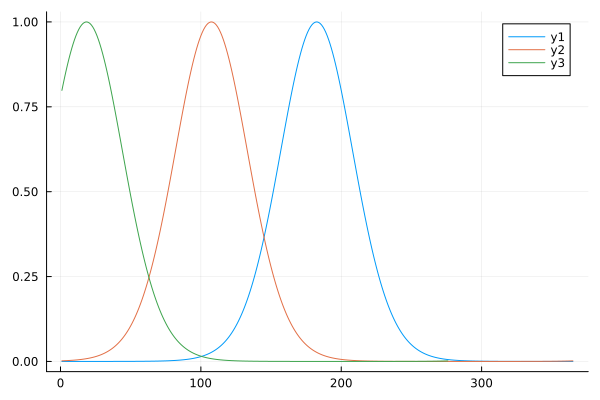

In [12]:
plot(birth_pulse(1:365,1,10,0))
plot!(birth_pulse(1:365,1,10,params[18]))
plot!(birth_pulse(90:365,1,10,params[18]))



In [13]:
function asf_model_pop(out,u,p,t)
    #ASF model for a single population (can make some speed increases) without farms!

    β_i, β_o, β_b, μ_p, K, ζ, γ, ω, ρ, λ, κ, σ, θ, η, g, Seasonal, bw, bo, k, la, lo, Area  = p 
    
    
    year = 365 #days in a year

    u[u.<0] .= 0
    
    S = Vector{UInt32}(u[1:5:end])
    
    connected_pops = β_b * S
    
    p_mag = birth_pulse_vector(t,k,bw,0)
    Births = p_mag.*(σ .* S .+ ((1-σ)) .* sqrt.(S.*K))
        
     #now stopping boar births
    mask_boar = (K .== 1) .& (S .> 0)
    boar_births = sum(mask_boar)
    Births[mask_boar] .= 0
    mask_p_s = (S .> 1) .& (K .> 1)
    Births[mask_p_s] .+= p_mag*boar_births ./ sum(mask_p_s) 

        
        #now stopping boar births
    if  p_mag > 0.5*mean(μ_p)
        mask_em =  (S .> 3) .& (K .> 1)
        mask_im = (S .== 0) .& (connected_pops .> 1) #population zero but connected groups have 3 or more pigs
        extra_b = sum(Births[mask_im] .= 4*p_mag)
        Births[mask_em] .-= extra_b ./ sum(mask_p_s)
    end
    
    out[1:11:end] .= Births
    out[2:11:end] .= S.*μ_p.*(σ .+ ((1-σ)-g).*sqrt.(S./K))
   
    nothing
end

asf_model_pop (generic function with 1 method)

In [14]:
using Colors

In [15]:
range(colorant"red", stop=colorant"green", length=8)

In [16]:
colours = range(HSV(0,1,1), stop=HSV(-360,1,1), length=20) # inverse rotation

In [17]:
plot(run_analysis(sol_burn)[4])
off = 75
for i in [0,45,90,135,180,225,270,315]
    vline!([off+i], label = "" )
end
plot!()

LoadError: UndefVarError: sol_burn not defined

### Fitting Population

In [18]:
AUSF_pop = function(params,Tspan, U0)
    #function that runs model for fitting

    rj = RegularJump(asf_model_pop, regular_c, eqs*nt)

    prob = DiscreteProblem(U0,Tspan,params)

    jump_prob = JumpProblem(prob,Direct(),rj)

    ensemble_prob_m = EnsembleProblem(jump_prob)

    outputs = solve(ensemble_prob_m, SimpleTauLeaping(), trajectories= n_runs,EnsembleThreads(),dt=1);

    res = eval_out_pop(outputs,U0)

    return res
end
    

function simulator_function_pop(var_params)

   
    input = ASF_Inputs.Model_Data(input_path);

    U0 = copy(input.U0);
    U0[1:5:end] += (U0[2:5:end] +U0[3:5:end]) #setting init pop to zero
    U0[2:5:end] .= 0
    U0[3:5:end] .= 0;
    
    params = ASF_Model.convert(input.Parameters)
    
    params[15] = var_params[1] #corpse decay rates
    
    Time = (0.0,n_years*365)
    #now we run simulation!
    AUSF_pop(params, Time, U0)
end

function eval_out_pop(output, U0)
    output_final = Matrix{Float64}(undef,(n_years*365+1,1))
    dist = zeros(Float64,n_runs)
    K = sum(U0)
   dummy = zeros(n_years*365+1)
    
    for i = 1:n_runs
        sol = output[i]
        data = reduce(vcat,transpose.(sol.u))
        data[data .< 0 ] .= 0

        s_d = data[:,1:5:end]
        
        pop_sum = sum(s_d,dims=2)[:,1]
        
        pop_crop = pop_sum./ode_norm
 
        dummy += pop_crop/n_runs
        
    
    end
    output_final[:] = dummy
    dist = euclidean(obs[:],dummy)
    if dist < threshold
        println(1)
    
    end
    return output_final
    
end

function observed_params()
   
    obs =  Matrix{Float64}(undef,(n_years*365+1,1))
    
    obs .= 1
    
    return obs
end

observed_params (generic function with 1 method)

In [19]:
#Need to figure out the norm
#Need to figure out the norm
input = ASF_Inputs.Model_Data(input_path);

U0_ode = [sum(input.U0)];
p_ode = [input.Parameters.k[1], input.Parameters.bw[1],input.Parameters.σ[1],sum(input.Parameters.K),input.Parameters.μ_p[1]];
tspan_ode = (0.0,10*365.0);

In [20]:
function density_carrying!(du,u,p,t)
    S = u[1]
    k, bw, σ, K, μ_p = p
   
    du[1] = birth_pulse_vector(t,k,bw,0).*(σ .* S .+ ((1-σ)) .* sqrt.(S.*K))-S.*μ_p.*(σ .+ ((1-σ)).*sqrt.(S./K))

end

density_carrying! (generic function with 1 method)

In [21]:
prob_ode = ODEProblem(density_carrying!, [4000], (0.0,10*365.0), p_ode)
sol_ode = solve(prob_ode, saveat = 1,reltol=1e-8);
ode_norm = reduce(vcat,transpose.(sol_ode.u));

In [22]:
#Some key parameters for G

input_path = "/home/callum/ASF/Inputs/"; #path to model data
n_years = 10 #how many years each sim will run for
n_runs = 3 #how many runs for each param
obs = observed_params() #our observed (just array of ones, we normalise output to be relative to this)
priors = [Uniform(0, 0.1)];

In [23]:
#Our params for fitting
n_particles = 100 #number of acceptances we want
devi = 0.99 #how close (from 0-1 with 1 being identical) do we want output to be to observed, used for threshold
threshold = sqrt((n_years*365+1)*((1-devi)^2));

In [ ]:
sim_result = SimulatedABCRejection(obs, simulator_function_pop, priors, threshold, n_particles; max_iter=10000, write_progress=false)#,

In [ ]:
plot(sim_result)

In [ ]:
median(sim_result.population)

In [ ]:
median(sim_result.population)

### Fitting ASF

Here we are fitting the diease dynamics to previously observed effects from outbreaks in the Baltic States

266.0
0.1591031490030187


3×1 Matrix{Float64}:
 0.9692415488351044
 0.8546249623782377
 1.0568667577859394

100
137

123
160

98
129



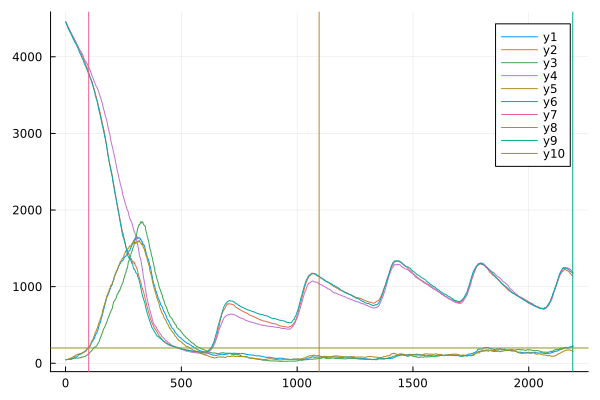

In [304]:
plot()
s = 0
ep = 0
mt = 0
pd = 0
pop_K = 4000
for i in 1:n_runs
    d, da,f,p = run_analysis(oo[i])

    if d[end] > 0

        ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
        pd += 100*(1-mean(p[3*365:end])/pop_K)
        
        max_d = findmax(d)[2][1]
        take_off_time = findfirst(>(pop_K*0.05), d)[1]
        println(take_off_time)
        
        take_off_time2 = findfirst(>(pop_K*0.1), d)[1]
        println(take_off_time2)
        println()
        mt += max_d-take_off_time
        s += 1
    end
    plot!(d)
    plot!(p)
end
vline!([100])
vline!([3*365])
vline!([6*365])
hline!([200])
plot!()

In [197]:
findmax(d)[2][1]

326

In [414]:
aaa = simulator_function_d([])

[0.8104212820403007; 0.9698726426287507; 0.7772058768035822;;]
8758


EnsembleSolution Solution of length 10 with uType:
ODESolution{Int16, 2, Vector{Vector{Int16}}, Nothing, Nothing, StepRange{Int64, Int64}, Nothing, DiscreteProblem{Vector{Int16}, Tuple{Int64, Int64}, true, Vector{Any}, DiscreteFunction{true, SciMLBase.FullSpecialize, SciMLBase.var"#192#193", Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}, SimpleTauLeaping, SciMLBase.ConstantInterpolation{StepRange{Int64, Int64}, Vector{Vector{Int16}}}, Nothing, Nothing}

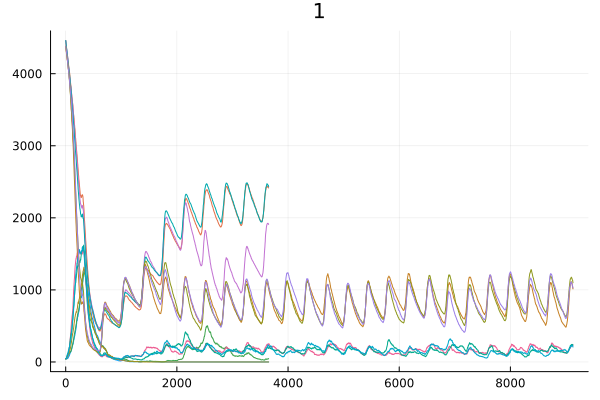

In [1008]:
plot!()
s = 0
ep = 0
mt = 0
pd = 0
detection_p = 0.1
pop_K = 4000
    starting_p = detection_p*pop_K

for i in 1:n_runs
    data = aaa[i]
    d, da,f,p = run_analysis(data)
    plot!(d, label= "")
    plot!(p, label = "")
    
    ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
    pd += 100*(1-mean(p[3*365:end])/pop_K)

    max_d = findmax(d)[2][1]

    if maximum(d) <= starting_p
        take_off_time = 0
    else
        take_off_time = findfirst(>(starting_p), d)[1]
    end

    mt += max_d-take_off_time
    s += 1
end
plot!()

1
2
3


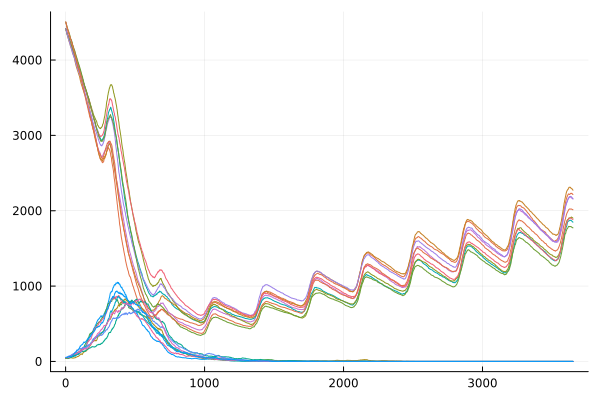

In [463]:
n_networks = 3
n_runs = 3
n_years = 10
store = zeros(n_networks,3)
xj = 0
plot()
for i in 1:n_networks
    xj += 1
    store[i,:] = simulator_function_d([0.5,0.05,0.6])
    println(xj)
end
plot!()

In [141]:
[4,5,6,1,4,5] .== 5

6-element BitVector:
 0
 1
 0
 0
 0
 1

In [173]:
function asf_model_one(out,u,p,t)
    #ASF model for a single population (can make some speed increases) without farms!

    β_i, β_o, β_b, μ_p, K, ζ, γ, ω, ρ, λ, κ, σ, θ, η, g, Seasonal, bw, bo, k, la, lo, Area    = p 
    ref_density = 1 #baseline density (from Baltics where modelled was fitted)
    year = 365 #days in a year

    u[u.<0] .= 0
    
    S = Vector{UInt8}(u[1:5:end])
    E = Vector{UInt8}(u[2:5:end])
    I = Vector{UInt8}(u[3:5:end])
    R = Vector{UInt8}(u[4:5:end])
    C = Vector{UInt8}(u[5:5:end])

    N = S .+ E .+ I .+ R .+ C
    Np = S .+ E .+ I .+ R
    
    N[N .== 0] .= 1
    
    tg = length(Np) #total groups in all populations
    tp = sum(Np) # total living pigs

    Density = sqrt((tp/Area)/ref_density) #density of population for beta
    Deaths = μ_p.*(σ .+ ((1-σ)-g).*sqrt.(Np)./sqrt.(K))
    

    Lambda = λ + la * cos((t + lo) * 2*pi/year)

    p_mag = birth_pulse_vector(t,k,bw,bo)
    Births = p_mag.*(σ .* Np .+ ((1-σ)) .* sqrt.(Np .* K))#Np.^(1-θ) .* K.^θ)
    
    #now stopping boar births
    mask_boar = (K .== 1) .& (Np .> 0) #boars with a positive population
    boar_births = p_mag*sum(mask_boar)
    Births[mask_boar] .= 0
    mask_p_s = (Np .> 1) .& (K .> 1) #moving it to postive 
    Births[mask_p_s] .+= boar_births ./ sum(mask_p_s) 
     
    
    n_empty  = sum(Np .== 0 ) 
    n_r = n_empty/tg
    
    
        
    dd = copy(Np)
    #dd[dd .< 2] .= 0
    connected_pops = β_b * dd
    
        #Groups with 3 or more pigs can have emigration
    mask_em =  (dd .>= 0) #populations that will have emigration

    em_force = sum(Births[mask_em]) #"extra" births in these populations that we will transfer
        
    mask_im = (Np .== 0) .& (connected_pops .> 1) #population zero but connected groups have 5 or more pigs
        
    Births[mask_em] .*= (1 - n_r)
    Births[mask_im] .= n_r*em_force/sum(mask_im)

    
    #populations = N.*β_b + (N.*β_b)'
    v = ones(Int8,tg)
        
    populations  = v*N'+ N*v'

    out[1:11:end] .= Births
    out[2:11:end] .= S.*Deaths
    out[3:11:end] .=  (((Density .* β_o .* S) ./ populations)*(I .+ ω .* C)).+ β_i .* (S ./ N) .* (I .+ ω .* C)
    out[4:11:end] .= E.*Deaths
    out[5:11:end] .= ζ .* E
    out[6:11:end] .= ρ .* γ .* I 
    out[7:11:end] .= I.*Deaths
    out[8:11:end] .= γ .* (1 .- ρ) .* I
    out[9:11:end] .= R.*Deaths
    out[10:11:end].= (1 ./ Lambda) .* C
    out[11:11:end] .= κ .* R 


    nothing
end

asf_model_one (generic function with 1 method)

In [174]:
start_day = 180
  n_runs = 3  
n_years = 10
Tspan = (start_day,365*n_years+start_day)

input = ASF_Inputs.Model_Data(input_path);

params = ASF_Model.convert(input.Parameters)

U0 = input.U0

Burn_U0 =  copy(U0)
Burn_U0[2:5:end] .= 0
Burn_U0[3:5:end] .= 0
rj_burn = RegularJump(asf_model_pop, regular_c, eqs*nt)
prob_burn = DiscreteProblem(Burn_U0,(0.0,10*365),params)
jump_prob_burn = JumpProblem(prob_burn, Direct(), rj_burn)
sol_burn = solve(jump_prob_burn, SimpleTauLeaping(),dt=1);

U_burn = copy(sol_burn[params[18]+start_day]); #population at start date
rr = rand(1:nt) #seeding diease in starting pop
ra = rr -1
if U_burn[ra*5+1] > 1
    U_burn[ra*5+1] = 0
    U_burn[ra*5+2] = 3
    U_burn[ra*5+3] = 2
else
    U_burn[ra*5+1] = 0
    U_burn[ra*5+3] = 1
end

netw = params[3][:,rr] #related populations
cons = findall(>(0), netw)
wanted=shuffle(cons)[1:4] #seeding in 4 other pops so 5 in total!
for i in cons
    i1 = i -1
    if U_burn[i1*5+1] > 1
        U_burn[i1*5+1] = 0
        U_burn[i1*5+2] = 3
        U_burn[i1*5+3] = 2
    else
        U_burn[i1*5+1] = 0
        U_burn[i1*5+3] = 1
    end

end

 rj = RegularJump(asf_model_one, regular_c, eqs*nt)
    prob = DiscreteProblem(U0,Tspan,params)
    jump_prob = JumpProblem(prob,Direct(),rj)
    ensemble_prob = EnsembleProblem(jump_prob)
    output = solve(ensemble_prob, SimpleTauLeaping(), trajectories= 3,EnsembleThreads(),dt=1)


EnsembleSolution Solution of length 3 with uType:
ODESolution{Int16, 2, Vector{Vector{Int16}}, Nothing, Nothing, StepRange{Int64, Int64}, Nothing, DiscreteProblem{Vector{Int16}, Tuple{Int64, Int64}, true, Vector{Any}, DiscreteFunction{true, SciMLBase.FullSpecialize, SciMLBase.var"#192#193", Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}, SimpleTauLeaping, SciMLBase.ConstantInterpolation{StepRange{Int64, Int64}, Vector{Vector{Int16}}}, Nothing, Nothing}

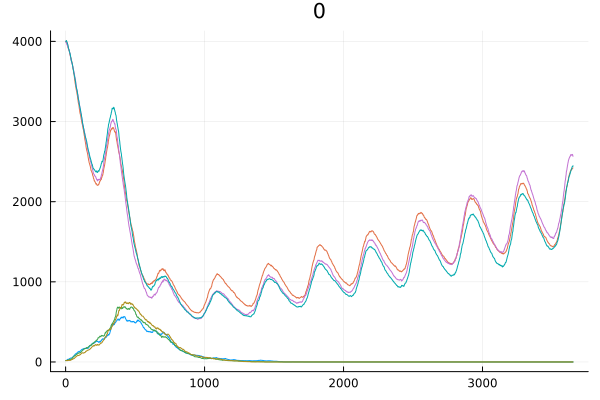

In [175]:
plot()
s = 0
ep = 0
mt = 0
pd = 0
detection_p = 0.05
pop_K = 4200

starting_p = detection_p*pop_K
for i in 1:n_runs
    d, da,f,p = run_analysis(output[i])
    plot!(d, label = "")
    plot!(p, label = "")
    if d[end] > 0

        ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
        pd += 100*(1-mean(p[3*365:end])/pop_K)

        max_d = findmax(d)[2][1]

        if maximum(d) <= starting_p
            take_off_time = 0
        else
            take_off_time = findfirst(>(starting_p), d)[1]
        end

        mt += max_d-take_off_time
        s += 1

    end

end

plot!(title = "$(s)")

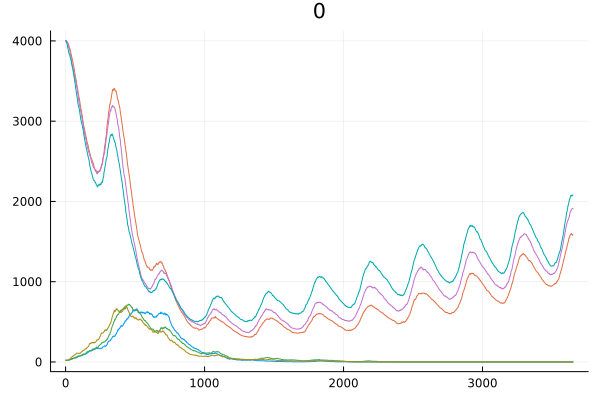

In [172]:
plot()
s = 0
ep = 0
mt = 0
pd = 0
detection_p = 0.05
pop_K = 4200

starting_p = detection_p*pop_K
for i in 1:n_runs
    d, da,f,p = run_analysis(output[i])
    plot!(d, label = "")
    plot!(p, label = "")
    if d[end] > 0

        ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
        pd += 100*(1-mean(p[3*365:end])/pop_K)

        max_d = findmax(d)[2][1]

        if maximum(d) <= starting_p
            take_off_time = 0
        else
            take_off_time = findfirst(>(starting_p), d)[1]
        end

        mt += max_d-take_off_time
        s += 1

    end

end

plot!(title = "$(s)")

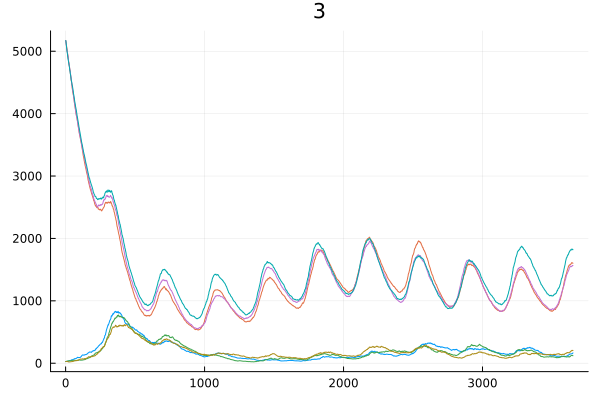

In [37]:
plot()
s = 0
ep = 0
mt = 0
pd = 0
detection_p = 0.05
pop_K = 4200

starting_p = detection_p*pop_K
for i in 1:n_runs
    d, da,f,p = run_analysis(output[i])
    plot!(d, label = "")
    plot!(p, label = "")
    if d[end] > 0

        ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
        pd += 100*(1-mean(p[3*365:end])/pop_K)

        max_d = findmax(d)[2][1]

        if maximum(d) <= starting_p
            take_off_time = 0
        else
            take_off_time = findfirst(>(starting_p), d)[1]
        end

        mt += max_d-take_off_time
        s += 1

    end

end

plot!(title = "$(s)")

In [82]:
dd[dd.<7] .=0

1000-element view(::Vector{Int16}, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  991, 992, 993, 994, 995, 996, 997, 998, 999, 1000]) with eltype Int16:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

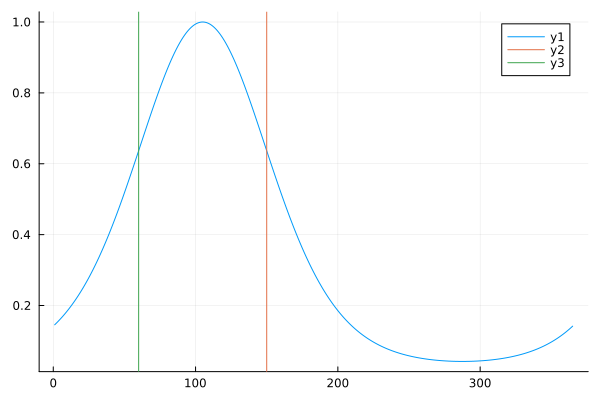

In [28]:
t = 1:365
s = 3.165
plot(t,birth_pulse(t,1,s,77.5))
vline!([150])
vline!([60])


In [30]:
n_networks = 3
n_runs = 3
n_years = 10


10

In [31]:
#Important means
month = 30
m_t = Normal(6*month,1*month)
p_d = Normal(80,5)
e_p = Normal(2.5,0.75)

Normal{Float64}(μ=2.5, σ=0.75)

In [32]:
function AUSF_d(dis_params,Tspan,U0)
    rj = RegularJump(asf_model_one, regular_c, eqs*nt)
    prob = DiscreteProblem(U0,Tspan,dis_params)
    jump_prob = JumpProblem(prob,Direct(),rj)
    ensemble_prob = EnsembleProblem(jump_prob)
    model_outs = solve(ensemble_prob, SimpleTauLeaping(), trajectories= 3,EnsembleThreads(),dt=1)
    return model_outs
    res = eval_out2(model_outs)
    
end
    
function simulator_function_d(var_params)
    start_day = 180
    
    Tspan = (start_day,365*n_years+start_day)
    
    input = ASF_Inputs.Model_Data(input_path);
    
    params = ASF_Model.convert(input.Parameters)
    
    U0 = input.U0

    Burn_U0 =  copy(U0)
    Burn_U0[2:5:end] .= 0
    Burn_U0[3:5:end] .= 0
    rj_burn = RegularJump(asf_model_pop, regular_c, eqs*nt)
    prob_burn = DiscreteProblem(Burn_U0,(0.0,275),params)
    jump_prob_burn = JumpProblem(prob_burn, Direct(), rj_burn)
    sol_burn = solve(jump_prob_burn, SimpleTauLeaping(),dt=1);
    
    U_burn = copy(sol_burn[params[18]+start_day]); #population at start date
    rr = rand(1:nt) #seeding diease in starting pop
    ra = rr -1
    if U_burn[ra*5+1] > 1
        U_burn[ra*5+1] = 0
        U_burn[ra*5+2] = 3
        U_burn[ra*5+3] = 2
    else
        U_burn[ra*5+1] = 0
        U_burn[ra*5+3] = 1
    end

    netw = params[3][:,rr] #related populations
    cons = findall(>(0), netw)
    wanted=shuffle(cons)[1:4] #seeding in 4 other pops so 5 in total!
    for i in cons
        i1 = i -1
        if U_burn[i1*5+1] > 1
            U_burn[i1*5+1] = 0
            U_burn[i1*5+2] = 3
            U_burn[i1*5+3] = 2
        else
            U_burn[i1*5+1] = 0
            U_burn[i1*5+3] = 1
        end

    end
    #beta
    
    params[1] .= var_params[1] #intra
    params[2][params[2] .!= 0 ] .= var_params[2]/n_con #inter
    
    #corpse 
    params[8] = var_params[3] #corpse infection modifier
    AUSF_d(params, Tspan, U_burn)
    
    
end


function eval_out(data) 

    output_final = Matrix{Float64}(undef,(3,1))
    s = 0
    ep = 0
    mt = 0
    pd = 0
    detection_p = 0.1
    pop_K = 4000
    
    starting_p = detection_p*pop_K
    for i in 1:n_runs
        d, da,f,p = run_analysis(data[i])

        if d[end] > 0
            
            ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
            pd += 100*(1-mean(p[3*365:end])/pop_K)
            
            max_d = findmax(d)[2][1]
            
            if maximum(d) <= starting_p
                take_off_time = 0
            else
                take_off_time = findfirst(>(starting_p), d)[1]
            end
            
            mt += max_d-take_off_time
            s += 1
            
        end

    end
    
    if s >= 2
        output_final[1] = pdf.(e_p,ep/s)/pdf.(e_p,mean(e_p))
        output_final[2] = pdf.(p_d,pd/s)/pdf.(p_d,mean(p_d))
        output_final[3] = pdf.(m_t,mt/s)/pdf.(m_t,mean(m_t))
        
    else
        output_final[1] = 0
        output_final[2] = 0
        output_final[3] = 0
       
    end
    println(output_final)
    dis = euclidean(output_final,obs)
    
    if dis < 0.5
        println(8758)
    else 
        println(4234)
    end
    
    return output_final
    
end
function eval_out2(data) 

    output_final = Matrix{Float64}(undef,(3,1))
    s = 0
    ep = 0
    mt = 0
    pd = 0
    detection_p = 0.1
    pop_K = 4000
    
    starting_p = detection_p*pop_K
    
    for i in 1:n_runs
        d, da,f,p = run_analysis(data[i])
        
        plot!(d, label= "")
        plot!(p, label="")
            
        ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
        pd += 100*(1-mean(p[3*365:end])/pop_K)

        max_d = findmax(d)[2][1]

        if maximum(d) <= starting_p
            take_off_time = 0
        else
            take_off_time = findfirst(>(starting_p), d)[1]
        end

        mt += max_d-take_off_time
        s += 1
            

    end
    
 
    output_final[1] = ep/s
    output_final[2] = pd/s
    output_final[3] = mt/s

 
   
    
    return data
    
end
function observed_params()
   
    obs =  Matrix{Float64}(undef,(3,1))
    
    obs[1] = 1 #2.5 #endemic prev
    obs[2] = 1#80 #population delcine %
    obs[3] = 1#8 month #time (days) from init to max
    
    return obs
end

observed_params (generic function with 1 method)

In [353]:
schedule_sig = [1,3/4,1/2];
thresh_shed = zeros(length(schedule_sig))
for (i,v) in enumerate(schedule_sig)
    thresh_shed[i] =  sqrt(3*(pdf.(e_p,(2.5)-0.75*v)/pdf.(e_p,2.5)-1)^2)
end

In [354]:
input_path = "/home/callum/ASF/Inputs/"; #path to model data
n_years = 6 #how many years each sim will run for
n_runs = 3 #how many runs for each param
n_con = 10  # average number of connections each group has
obs = observed_params() #our observed (just array of ones, we normalise output to be relative to this)
priors = [Uniform(0.1, 1.0), Uniform(0.025, 0.1), Uniform(0.1, 1.0)];

In [350]:
n_particles = 100;

In [377]:
sim_abcsmc_res = SimulatedABCSMC(obs,simulator_function_d,priors,thresh_shed,n_particles; write_progress=true)

┌ Info: GpABC rejection simulation. ϵ = 0.6815088885983268.
└ @ GpABC /home/callum/.julia/packages/GpABC/o0EN1/src/abc/rejection.jl:47


1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5


4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1

┌ Info: GpABC rejection simulation. Accepted 54/1000 particles.
└ @ GpABC /home/callum/.julia/packages/GpABC/o0EN1/src/abc/rejection.jl:87
┌ Warning: Simulation reached maximum iterations 1000 before finding 100 particles - will return 54
└ @ GpABC /home/callum/.julia/packages/GpABC/o0EN1/src/abc/rejection.jl:92
┌ Info: GpABC SMC simulation ϵ = 0.42463026535884724
└ @ GpABC /home/callum/.julia/packages/GpABC/o0EN1/src/abc/smc.jl:193


1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5


┌ Info: GpABC SMC simulation ϵ = 0.2035213347701959
└ @ GpABC /home/callum/.julia/packages/GpABC/o0EN1/src/abc/smc.jl:193


4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1

4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1
3
2
4
5
4234
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
8758
1
3
2
4
5
4234
1

┌ Info: GpABC SMC simulation accepted 25/1000 particles.
└ @ GpABC /home/callum/.julia/packages/GpABC/o0EN1/src/abc/smc.jl:238
┌ Warning: Simulation reached maximum 1000 iterations before finding 100 particles - will return 25
└ @ GpABC /home/callum/.julia/packages/GpABC/o0EN1/src/abc/smc.jl:248


GpABC.SimulatedABCSMCOutput(3, [54, 100, 25], [1000, 494, 1000], [0.6815088885983268, 0.42463026535884724, 0.2035213347701959], AbstractMatrix{Float64}[[0.5802660203750202 0.09267743538282969 0.8673139595126182; 0.887258701651767 0.09026139325305974 0.8735537497131531; … ; 0.888832306746917 0.09660294932414523 0.8881811165669844; 0.6270722819836373 0.09535803863888151 0.9335019846848204], [0.5046472387884231 0.08073740965316901 0.9328720556901864; 0.3222970300450857 0.08394248603271326 0.9548555814672215; … ; 0.36056578367491 0.0944960969819573 0.9147522023318212; 0.8637696385321729 0.09136014438069966 0.8907958724393561], [0.1931148484128578 0.09651922779262334 0.9467311633939075; 0.6051831762956318 0.08475678194271048 0.950580375157566; … ; 0.1339004071610631 0.09327865664016145 0.911425016615182; 0.23102923226660976 0.09175734410171667 0.995916788197973]], AbstractVector{Float64}[[0.24843989091355134, 0.4700467916795358, 0.6368963043166338, 0.601775946173797, 0.436868904785908, 0.28

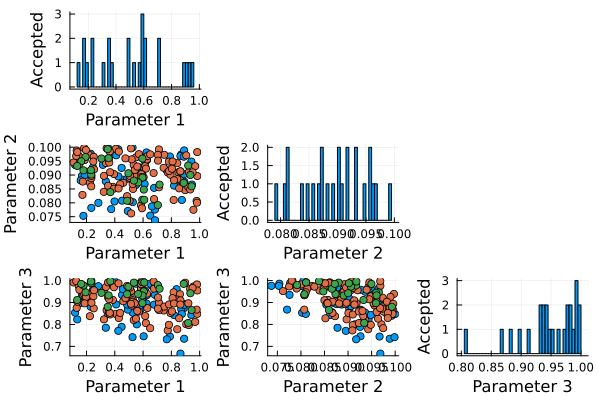

In [378]:
plot(sim_abcsmc_res)

In [380]:
    sim_abcsmc_res.population[3][1,:]

3-element Vector{Float64}:
 0.1931148484128578
 0.09651922779262334
 0.9467311633939075

In [387]:
    data = sim_abcsmc_res.population[3]
vars = ["β_intra", "β_inter", "ω"]
for i in 1:3
    wanted = data[:,i]
    println(vars[i])
    println("Median: ", round(median(wanted),digits=4))
    println("Mean: ", round(mean(wanted), digits=4))
    
    println()
end

β_intra
Median: 0.535
Mean: 0.508

β_inter
Median: 0.09
Mean: 0.0894

ω
Median: 0.9506
Mean: 0.9481



In [368]:
9999*5+5

50000